**Brian Blaylock**  
**December 4, 2018**

# Mean HRRR Model Spread FOR A THRESHOLD CONDITION

The model spread is the standard deviation between all the members. The mean model spread, however, is the square root of the mean variance.

> Fortin, V., M. Abaza, F. Anctil, and R. Turcotte, 2014: Why Should Ensemble Spread Match the RMSE of the Ensemble Mean?. J. Hydrometeor., 15, 1708–1713, https://doi.org/10.1175/JHM-D-14-0008.1  
>See equation (16)


In [1]:
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
sys.path.append('B:\pyBKB_v3')
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, get_hrrr_variable
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from BB_HRRR.HRRR_Spread import mean_spread_threshold
from BB_datetimes.range import range_dates

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15,9]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

In [2]:
# Geospatial and Basemap
latlon = get_hrrr_latlon()
lat = latlon['lat']
lon = latlon['lon']

# CONUS Domain
m = draw_HRRR_map()

# Western US
mW = draw_centermap(40, -115, (10,10))

# Utah 
mU = draw_centermap(39.5, -111.6, (3.2,3.2))

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
hour = 12
sDATE = datetime(2018, 5, 1, hour)
eDATE = datetime(2018, 5, 16, hour)
DATES = range_dates(sDATE, eDATE, DAYS=1)

fxx = range(19)

In [4]:
variable = 'GUST:surface'

In [14]:
HH0 = np.array([get_hrrr_variable(DATES[0]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH1 = np.array([get_hrrr_variable(DATES[1]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH2 = np.array([get_hrrr_variable(DATES[2]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH3 = np.array([get_hrrr_variable(DATES[3]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH4 = np.array([get_hrrr_variable(DATES[4]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH5 = np.array([get_hrrr_variable(DATES[5]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH6 = np.array([get_hrrr_variable(DATES[6]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH7 = np.array([get_hrrr_variable(DATES[7]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH8 = np.array([get_hrrr_variable(DATES[8]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH9 = np.array([get_hrrr_variable(DATES[9]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH10 = np.array([get_hrrr_variable(DATES[10]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH11 = np.array([get_hrrr_variable(DATES[11]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH12 = np.array([get_hrrr_variable(DATES[12]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])
HH13 = np.array([get_hrrr_variable(DATES[13]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])

In [15]:
HH14 = np.array([get_hrrr_variable(DATES[14]-timedelta(hours=f), variable, f, verbose=False)['value'] for f in fxx])

In [16]:
# The variance for all gridpoints along the forecasts axis
HH0_var = np.var(HH0, ddof=1, axis=0)
HH1_var = np.var(HH1, ddof=1, axis=0)
HH2_var = np.var(HH2, ddof=1, axis=0)
HH3_var = np.var(HH3, ddof=1, axis=0)
HH4_var = np.var(HH4, ddof=1, axis=0)
HH5_var = np.var(HH5, ddof=1, axis=0)
HH6_var = np.var(HH6, ddof=1, axis=0)
HH7_var = np.var(HH7, ddof=1, axis=0)
HH8_var = np.var(HH8, ddof=1, axis=0)
HH9_var = np.var(HH9, ddof=1, axis=0)
HH10_var = np.var(HH10, ddof=1, axis=0)
HH11_var = np.var(HH11, ddof=1, axis=0)
HH12_var = np.var(HH12, ddof=1, axis=0)
HH13_var = np.var(HH13, ddof=1, axis=0)
HH14_var = np.var(HH14, ddof=1, axis=0)

# Mask our all the ares where the forecasted wind is less than 10 m/s
masked = {0:np.ma.array(HH0_var, mask=np.max(HH0, axis=0)<10),
          1:np.ma.array(HH1_var, mask=np.max(HH1, axis=0)<10),
          2:np.ma.array(HH2_var, mask=np.max(HH2, axis=0)<10),
          3:np.ma.array(HH3_var, mask=np.max(HH3, axis=0)<10),
          4:np.ma.array(HH4_var, mask=np.max(HH4, axis=0)<10),
          5:np.ma.array(HH5_var, mask=np.max(HH5, axis=0)<10),
          6:np.ma.array(HH6_var, mask=np.max(HH6, axis=0)<10),
          7:np.ma.array(HH7_var, mask=np.max(HH7, axis=0)<10),
          8:np.ma.array(HH8_var, mask=np.max(HH8, axis=0)<10),
          9:np.ma.array(HH9_var, mask=np.max(HH9, axis=0)<10),
          10:np.ma.array(HH10_var, mask=np.max(HH10, axis=0)<10),
          11:np.ma.array(HH11_var, mask=np.max(HH11, axis=0)<10),
          12:np.ma.array(HH12_var, mask=np.max(HH12, axis=0)<10),
          13:np.ma.array(HH13_var, mask=np.max(HH13, axis=0)<10),
          14:np.ma.array(HH14_var, mask=np.max(HH14, axis=0)<10)}

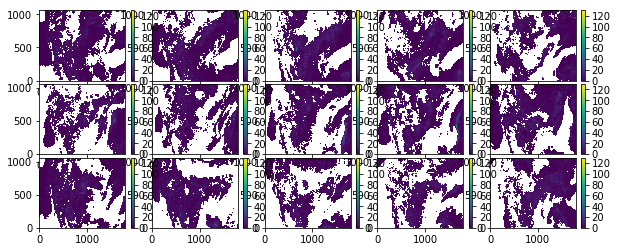

In [17]:
fig, axes = plt.subplots(3,5, figsize=[10,4])
axes = axes.flatten()
for i, ax in enumerate(axes):
    plt.sca(ax)
    # Plot the variances for the mask
    plt.pcolormesh(masked[i], vmin=0, vmax=130)
    plt.colorbar()

In [18]:
all_masked_vars = np.ma.dstack([masked[i] for i in masked.keys()])

In [19]:
mean_var = np.ma.mean(all_masked_vars, axis=2)
mean_spread = np.sqrt(mean_var)

In [20]:
sample_count = np.ma.sum(all_masked_vars>0, axis=2)

In [21]:
np.shape(all_masked_vars)

(1059, 1799, 15)

Text(0.5,1,'Samples\n(# valid times at least 1 fxx exceeded thresh)')

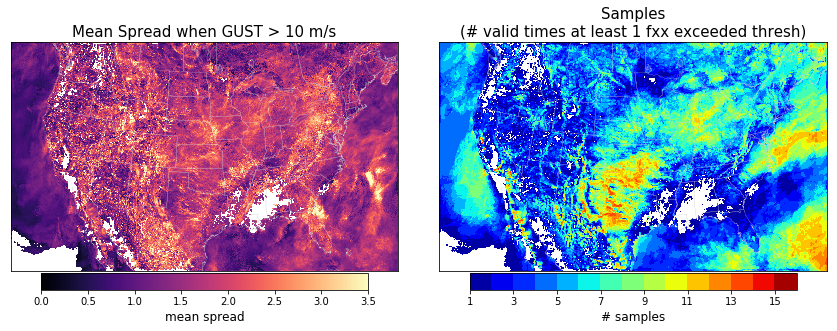

In [22]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[15, 5])

plt.sca(ax1)
m.pcolormesh(lon, lat, mean_spread, vmin=0, vmax=3.5, cmap='magma', latlon=True)
plt.colorbar(orientation='horizontal', label='mean spread', pad=.01, shrink=.8)
m.drawcoastlines(linewidth=.2, color='lightgrey')
m.drawcountries(linewidth=.2, color='lightgrey')
m.drawstates(linewidth=.2, color='lightgrey')
plt.title('Mean Spread when GUST > 10 m/s')

plt.sca(ax2)
m.contourf(lon, lat, sample_count, cmap='jet', levels=range(1,np.shape(all_masked_vars)[-1]+2), latlon=True)
plt.colorbar(orientation='horizontal', label='# samples', pad=.01, shrink=.8)
m.drawcoastlines(linewidth=.2, color='lightgrey')
m.drawcountries(linewidth=.2, color='lightgrey')
m.drawstates(linewidth=.2, color='lightgrey')

plt.title('Samples\n(# valid times at least 1 fxx exceeded thresh)')

In [23]:
list(range(1,np.shape(all_masked_vars)[-1]+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [114]:
# Only consider values greather than 10 m/s
condition = {'condition': '>=',
             'threshold': 10}

if condition['condition'] == '>':
    # We want values .GT. a threshold. Thus, mask all values .LT. the threshold.
    masked_with_thresh = np.ma.array(HH0_var, mask=np.max(HH0, axis=0) < condition['threshold'])
elif condition['condition'] == '>=':
    masked_with_thresh = np.ma.array(HH0_var, mask=np.max(HH0, axis=0) <= condition['threshold'])
elif condition['condition'] == '<':
    masked_with_thresh =np.ma.array(HH0_var, mask=np.min(HH0, axis=0) > condition['threshold'])
elif condition['condition'] == '<=':
    masked_with_thresh =np.ma.array(HH0_var, mask=np.min(HH0, axis=0) >= condition['threshold'])



In [115]:
np.shape(masked_with_thresh)

(1059, 1799)

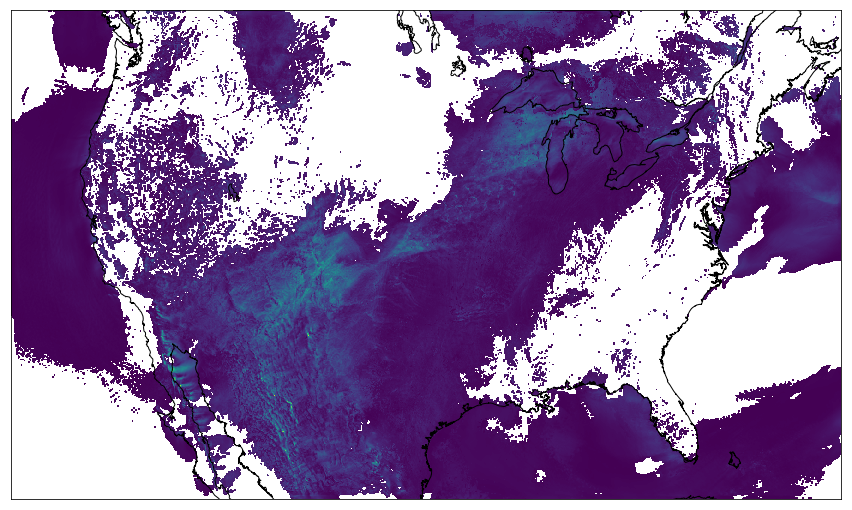

In [116]:
m.pcolormesh(lon, lat, masked_with_thresh, latlon=True)
m.drawcoastlines()

In [5]:
MST = mean_spread_threshold(DATES, variable=variable, fxx=range(0,19))

Progress: 13% (2 of 15) complete ----> Downloading 02 May 2018 12:00 UTC, GUST:surface
Progress: 20% (3 of 15) complete ----> Downloading 03 May 2018 12:00 UTC, GUST:surface
Progress: 33% (5 of 15) complete ----> Downloading 05 May 2018 12:00 UTC, GUST:surface
Progress: 06% (1 of 15) complete ----> Downloading 01 May 2018 12:00 UTC, GUST:surface
Progress: 53% (8 of 15) complete ----> Downloading 08 May 2018 12:00 UTC, GUST:surface
Progress: 26% (4 of 15) complete ----> Downloading 04 May 2018 12:00 UTC, GUST:surface
Progress: 60% (9 of 15) complete ----> Downloading 09 May 2018 12:00 UTC, GUST:surface
Progress: 46% (7 of 15) complete ----> Downloading 07 May 2018 12:00 UTC, GUST:surface
Progress: 40% (6 of 15) complete ----> Downloading 06 May 2018 12:00 UTC, GUST:surface
Progress: 66% (10 of 15) complete ----> Downloading 10 May 2018 12:00 UTC, GUST:surface
Progress: 86% (13 of 15) complete ----> Downloading 13 May 2018 12:00 UTC, GUST:surface
Progress: 73% (11 of 15) complete ----> D

In [15]:
mean_spread, sample_count = MST

In [27]:
np.ma.max(sample_count)

15

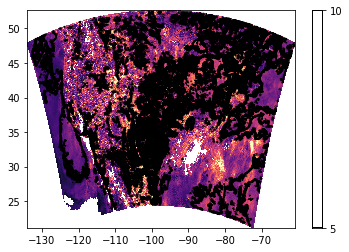

In [26]:
plt.pcolormesh(lon, lat, mean_spread, cmap='magma', vmin=0, vmax=3.5)
plt.contour(lon, lat, sample_count, levels=range(0,np.ma.max(sample_count),5), colors='k', linewidths=2)
plt.colorbar()

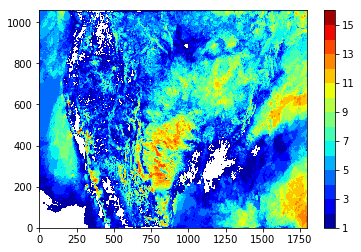

In [31]:
plt.contourf(sample_count, cmap='jet', levels=range(1, np.ma.max(sample_count)+2))
plt.colorbar()